In [1]:
import carbonbench
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [3]:
splits = ['IGBP', 'Koppen']
for split in splits:
    print(split)
    dfs = [pd.read_csv(f'./eval_results/{f}') for f in os.listdir('./eval_results') if split in f]
    df = pd.concat(dfs, axis=0)
    df = df.groupby(['model', 'target'])[['R2', 'RMSE', 'RAE', 'nMAE']].agg({
        'R2': ['median', q25, q75],
        'RMSE': ['median', q25, q75],
        'RAE': ['median', q25, q75],
        'nMAE': ['median', q25, q75]
    }).round(3)
    print(df)

IGBP
                                          R2                 RMSE         \
                                      median    q25    q75 median    q25   
model             target                                                   
ctgru             GPP_NT_VUT_USTAR50   0.559  0.243  0.790  1.668  1.157   
                  NEE_VUT_USTAR50      0.284  0.013  0.467  1.440  1.028   
                  RECO_NT_VUT_USTAR50  0.321 -0.448  0.732  1.245  0.843   
ctlstm            GPP_NT_VUT_USTAR50   0.614  0.235  0.795  1.578  1.120   
                  NEE_VUT_USTAR50      0.285  0.004  0.481  1.337  0.944   
                  RECO_NT_VUT_USTAR50  0.406 -0.317  0.750  1.202  0.821   
gru               GPP_NT_VUT_USTAR50   0.520  0.138  0.733  1.658  1.190   
                  NEE_VUT_USTAR50      0.281  0.025  0.441  1.344  0.942   
                  RECO_NT_VUT_USTAR50  0.389 -0.273  0.708  1.273  0.823   
lstm              GPP_NT_VUT_USTAR50   0.582  0.219  0.780  1.571  1.091   
       

In [5]:
splits = ['IGBP', 'Koppen']
for split in splits:
    dfs = [pd.read_csv(f'./eval_results/{f}') for f in os.listdir('./eval_results') if split in f]
    df = pd.concat(dfs, axis=0)

In [6]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

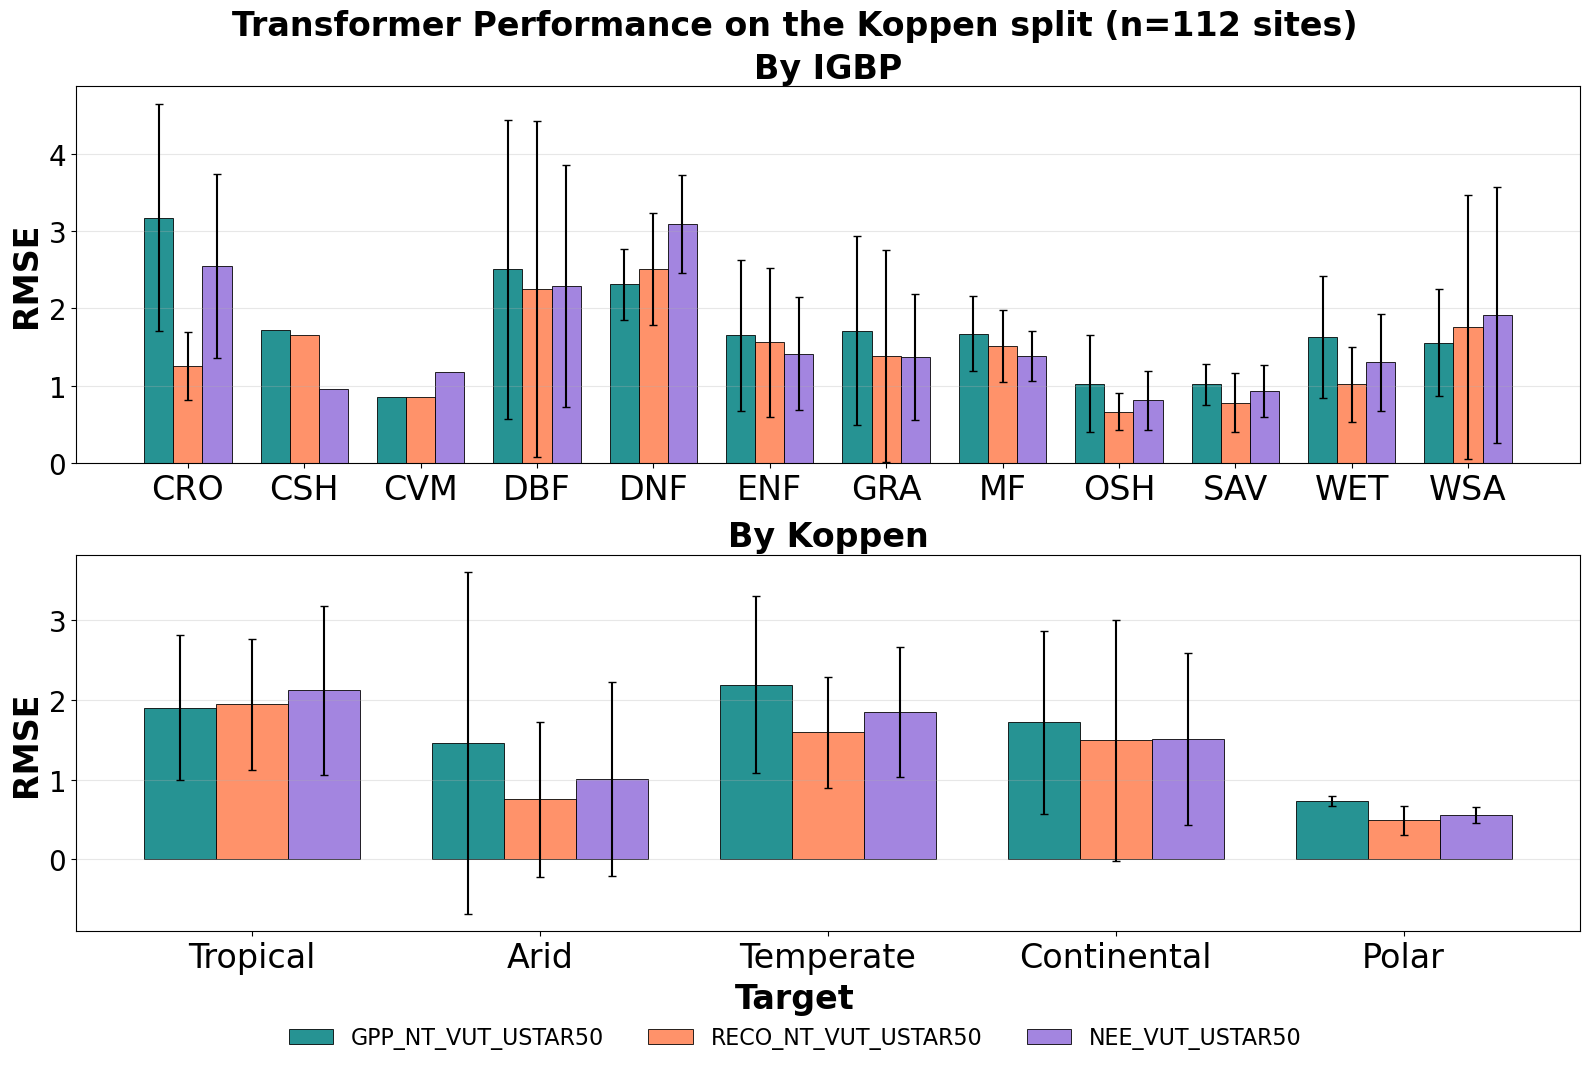

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

targets_map = {
    'GPP_NT_VUT_USTAR50': 'GPP_NT_VUT_USTAR50',
    'RECO_NT_VUT_USTAR50': 'RECO_NT_VUT_USTAR50',
    'NEE_VUT_USTAR50': 'NEE_VUT_USTAR50'
}

koppen_map = {
    'A': 'Tropical',
    'B': 'Arid',
    'C': 'Temperate',
    'D': 'Continental',
    'E': 'Polar'
}

colors = ['teal', 'coral', 'mediumpurple']

for ax_idx, category_col in enumerate(['IGBP', 'Koppen']):
    ax = axes[ax_idx]
    categories = sorted(df[category_col].unique())
    
    # Map Koppen if needed
    if category_col == 'Koppen':
        categories_display = [koppen_map.get(cat[0], cat) for cat in categories]
    else:
        categories_display = categories
    
    n_cats = len(categories)
    x = np.arange(n_cats)
    width = 0.25
    
    for k, (target_full, target_short) in enumerate(targets_map.items()):
        means = []
        stds = []
        for cat in categories:
            subset = df[(df['target'] == target_full) & 
                       (df['model'] == 'transformer') & 
                       (df[category_col] == cat)]
            means.append(subset['RMSE'].mean())
            stds.append(subset['RMSE'].std())
        
        ax.bar(x + k*width, means, width, label=target_short, yerr=stds,
               capsize=3, alpha=0.85, color=colors[k], 
               edgecolor='black', linewidth=0.7)
    
#     ax.set_xlabel(category_col, fontsize=12, fontweight='bold')
    ax.set_ylabel('RMSE', fontsize=24, fontweight='bold')
    ax.set_title(f'By {category_col}', 
                fontsize=24, fontweight='bold')
    ax.set_xticks(x + width)
    ax.set_xticklabels(categories_display, rotation=0, ha='center', fontsize=24)
    ax.grid(axis='y', alpha=0.3)

# Shared legend
from matplotlib.patches import Rectangle
handles_temp, labels = axes[0].get_legend_handles_labels()
colors_legend = [ha.patches[0].get_facecolor() for ha in handles_temp]
new_handles = [Rectangle((0,0), 1, 1, facecolor=c, edgecolor='black', 
                         linewidth=0.7, alpha=0.85) for c in colors_legend]

fig.legend(new_handles, labels, loc='lower center', ncol=3, frameon=False,
           fontsize=16, bbox_to_anchor=(0.5, -0.08), title='Target', 
           title_fontproperties={'weight': 'bold', 'size': 24})

plt.suptitle(f'Transformer Performance on the Koppen split (n={df["site"].nunique()} sites)', 
            fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('./figs/transformer_rmse_comparison.png', bbox_inches='tight')
plt.show()